# 1D DCT

In [1]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter
import matplotlib as mpl
from matplotlib import pyplot as plt

# this makes the images a bit larger
mpl.rcParams['figure.dpi']= 200
plt.rcParams["figure.figsize"] = (10,20)

# plots directly in the notebook
%matplotlib inline 

# if you have a high-dpi monitor
%config InlineBackend.figure_format = 'retina'

# from numpy import linalg as LA

In [2]:
N = 3
C = np.zeros(shape=(N,N))

In [3]:
for i in range(N):
    for j in range(N):
        if i == 0:
            c_i = np.sqrt(1/N)
        else:
            c_i = np.sqrt(2/N)
        C[i][j] = c_i * np.cos(((2*j+1)*np.pi*i)/(2*N))

print(C)

[[ 5.77350269e-01  5.77350269e-01  5.77350269e-01]
 [ 7.07106781e-01  4.99959962e-17 -7.07106781e-01]
 [ 4.08248290e-01 -8.16496581e-01  4.08248290e-01]]


In [4]:
np.max(abs(np.linalg.inv(C)-C.T))
# np.max(abs(LA.inv(C)-C.T))

2.220446049250313e-16

# 2D DCT

In [5]:
# TODO

# Conversion RGB zu YCbCr

In [6]:
def RGB_to_YCbCr(image):
    xform = np.array([[0.301, 0.586, 0.113],
                      [-0.172, -0.340, 0.512],
                      [0.512, -0.430, -0.082]
                     ])
    YCbCr = image.dot(xform.T)
    YCbCr[:,:,[1,2]] += 128
    return np.uint8(YCbCr)


def YCbCr_to_RGB(image):
    xfrom = np.array([[1, 0, 1.371],
                      [1, -0.336, -0.698],
                      [1, 1.732, 0]
                     ])
    RGB = image.astype(np.float)
    RGB[:,:,[1,2]] -= 128
    RGB = RGB.dot(xfrom.T)
    np.putmask(RGB, RGB > 255, 255)
    no.putmask(RGB, RGB < 0, 0)
    return np.uint8(RGB)

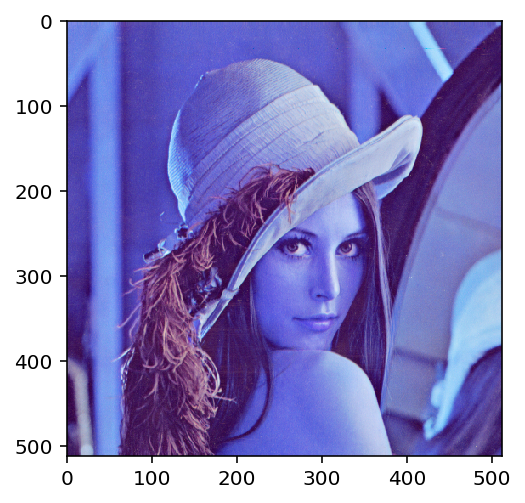

In [9]:
image = cv2.imread('../data/lena_std.tif')
plt.imshow(image)

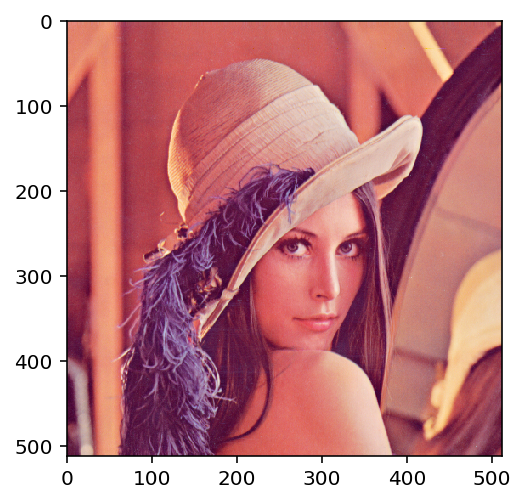

In [11]:
image = cv2.imread('../data/lena_std.tif')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

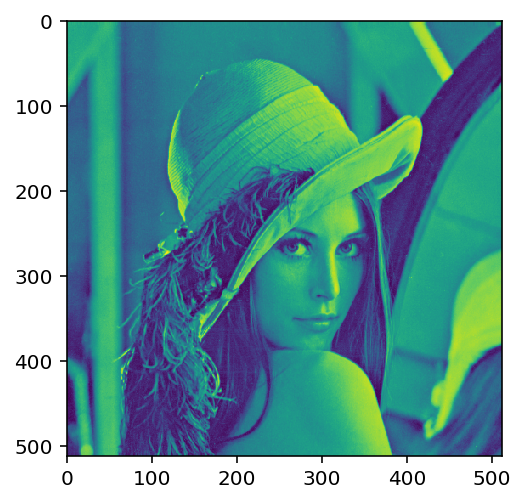

In [18]:
lena_YCbCr = RGB_to_YCbCr(image_rgb)
plt.imshow(lena_YCbCr[:,:,0])

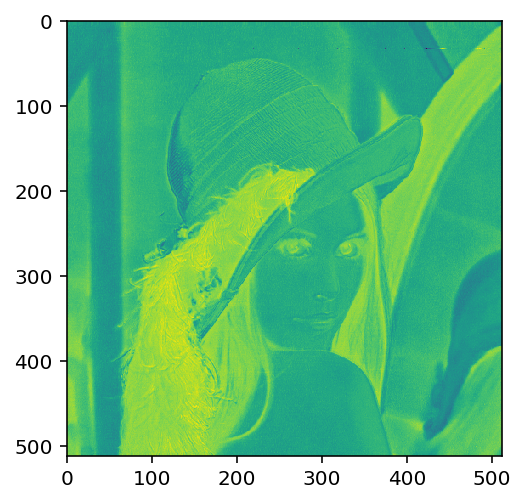

In [20]:
plt.imshow(lena_YCbCr[:,:,1])

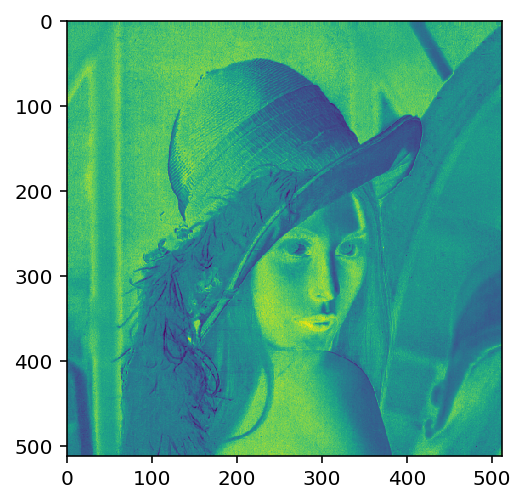

In [19]:
plt.imshow(lena_YCbCr[:,:,2])